## 1차 과제 - 고객 유지/이탈 자유 분석
- 주제: 가입 고객 이탈 데이터를 분석하여 기업에 인사이트 제공
- 데이터: Customer Churn Data(train data가 따로 있으나 너무 커서 test data만 사용, 예측 성능 향상을 원한다면 train data 사용해도 무방)
https://www.kaggle.com/datasets/muhammadshahidazeem/customer-churn-dataset?select=customer_churn_dataset-training-master.csv
- 사용 라이브러리: 자유

본 과제는 여러분들의 실력을 확인하고자 출제한 과제로 어떠한 가이드라인도 제공하거나 제약하지 않으며 자유롭게 분석하시면 됩니다.

분석이나 예측 어느 쪽이든 상관없으며 몇가지 조건만 유의하여 주시기 바랍니다.

### 조건
1. 기본적인 분석 과정은 EDA(데이터 탐색) > 전처리 > 분석(예측) 진행 > 결과 해석 으로 진행되지만 약간의 수정 허용
2. EDA 과정에서 최소 2개의 시각화 모형(그래프) 사용
3. 분석 및 예측 시 최소 2개의 모형(모델) 사용
4. 전처리는 자유롭게 진행하며 추가적인 데이터 사용이 필요하다면 허용

1. 데이터 불러오기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
df = pd.read_csv("/content/gdrive/MyDrive/DAT/4기 과제/customer_churn_dataset-testing-master.csv")
df.head(10)

,CustomerID,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,1,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,2,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,3,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,4,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,5,53,Female,58,24,9,2,Standard,Annual,533,18,0
5,6,30,Male,41,14,10,10,Premium,Monthly,500,29,0
6,7,47,Female,37,15,9,28,Basic,Quarterly,574,14,1
7,8,54,Female,36,11,0,18,Standard,Monthly,323,16,0
8,9,36,Male,20,5,10,8,Basic,Monthly,687,8,0
9,10,65,Male,8,4,2,23,Basic,Annual,995,10,0


In [4]:
df = df.drop(columns = 'CustomerID') # 필요없는 열 제거
df.head(10)

,Age,Gender,Tenure,Usage Frequency,Support Calls,Payment Delay,Subscription Type,Contract Length,Total Spend,Last Interaction,Churn
0,22,Female,25,14,4,27,Basic,Monthly,598,9,1
1,41,Female,28,28,7,13,Standard,Monthly,584,20,0
2,47,Male,27,10,2,29,Premium,Annual,757,21,0
3,35,Male,9,12,5,17,Premium,Quarterly,232,18,0
4,53,Female,58,24,9,2,Standard,Annual,533,18,0
5,30,Male,41,14,10,10,Premium,Monthly,500,29,0
6,47,Female,37,15,9,28,Basic,Quarterly,574,14,1
7,54,Female,36,11,0,18,Standard,Monthly,323,16,0
8,36,Male,20,5,10,8,Basic,Monthly,687,8,0
9,65,Male,8,4,2,23,Basic,Annual,995,10,0


2. EDA, 전처리



In [ ]:
df.info() # 결측값이 존재하지 않음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64374 entries, 0 to 64373
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   CustomerID         64374 non-null  int64 
 1   Age                64374 non-null  int64 
 2   Gender             64374 non-null  object
 3   Tenure             64374 non-null  int64 
 4   Usage Frequency    64374 non-null  int64 
 5   Support Calls      64374 non-null  int64 
 6   Payment Delay      64374 non-null  int64 
 7   Subscription Type  64374 non-null  object
 8   Contract Length    64374 non-null  object
 9   Total Spend        64374 non-null  int64 
 10  Last Interaction   64374 non-null  int64 
 11  Churn              64374 non-null  int64 
dtypes: int64(9), object(3)
memory usage: 5.9+ MB


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,64374.0,41.970982,13.924911,18.0,30.0,42.0,54.0,65.0
Tenure,64374.0,31.994827,17.098234,1.0,18.0,33.0,47.0,60.0
Usage Frequency,64374.0,15.080234,8.816470,1.0,7.0,15.0,23.0,30.0
Support Calls,64374.0,5.400690,3.114005,0.0,3.0,6.0,8.0,10.0
Payment Delay,64374.0,17.133952,8.852211,0.0,10.0,19.0,25.0,30.0
Total Spend,64374.0,541.023379,260.874809,100.0,313.0,534.0,768.0,1000.0
Last Interaction,64374.0,15.498850,8.638436,1.0,8.0,15.0,23.0,30.0
Churn,64374.0,0.473685,0.499311,0.0,0.0,0.0,1.0,1.0


2-1. 나이대에 따른 이탈 비율 -> 50대 이상 고객의 이탈율이 높다.

<ipython-input-10-fe588556ce18>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_churn_rate = df.groupby('AgeGroup')['Churn'].mean()
<ipython-input-10-fe588556ce18>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_churn_rate.index, y=age_churn_rate.values, palette='pastel')


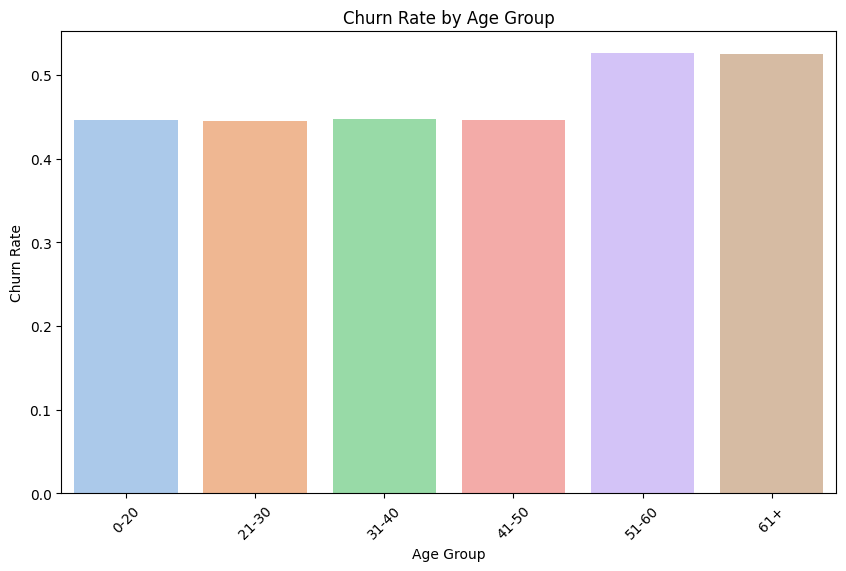

In [10]:
age_bins = [0, 20, 30, 40, 50, 60, float('inf')]
age_labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61+']
df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)
age_churn_rate = df.groupby('AgeGroup')['Churn'].mean()
plt.figure(figsize=(10, 6))
sns.barplot(x=age_churn_rate.index, y=age_churn_rate.values, palette='pastel')
plt.xlabel('Age Group')
plt.ylabel('Churn Rate')
plt.title('Churn Rate by Age Group')
plt.xticks(rotation=45)
plt.show()

<ipython-input-8-390084138f0c>:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_churn = df.groupby('Age Group')['Churn'].value_counts(normalize=True).unstack()


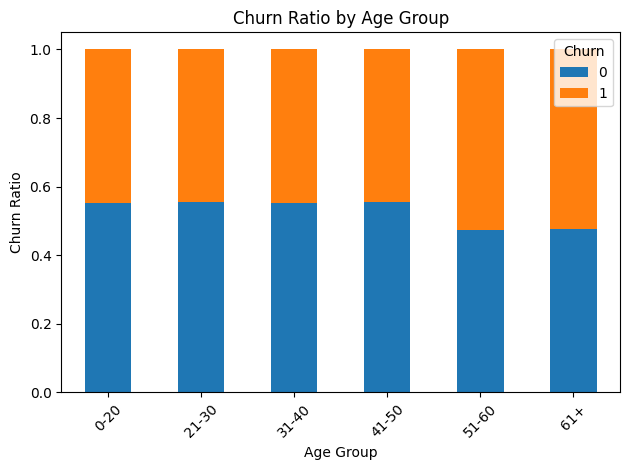

In [8]:
# Defining age groups
age_bins = [0, 20, 30, 40, 50, 60, float('inf')]
age_labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61+']
df['Age Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

# Calculating churn ratio for each age group
age_group_churn = df.groupby('Age Group')['Churn'].value_counts(normalize=True).unstack()

# Visualizing the churn ratio by age group
import matplotlib.pyplot as plt

age_group_churn.plot(kind='bar', stacked=True)

plt.title('Churn Ratio by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Churn Ratio')
plt.xticks(rotation=45)
plt.legend(title='Churn', loc='upper right')
plt.tight_layout()

plt.show()

2-2. 이탈한 고객 남녀 비율 -> 남성 고객의 이탈율이 여성보다 높음

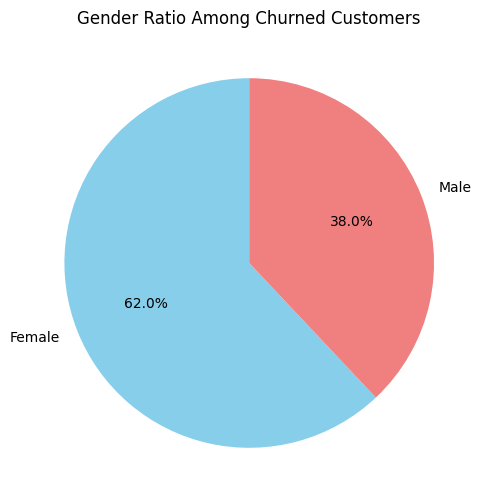

In [14]:
churned_customers = df[df['Churn'] == 1]
gender_ratio = churned_customers['Gender'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(gender_ratio, labels=gender_ratio.index, autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Gender Ratio Among Churned Customers')
plt.show()

2-3. 마지막 상호작용 날짜에 따른 이탈 수 시각화 -> 마지막 상호작용 날짜와 이탈율은 관계가 없음을 의미한다.

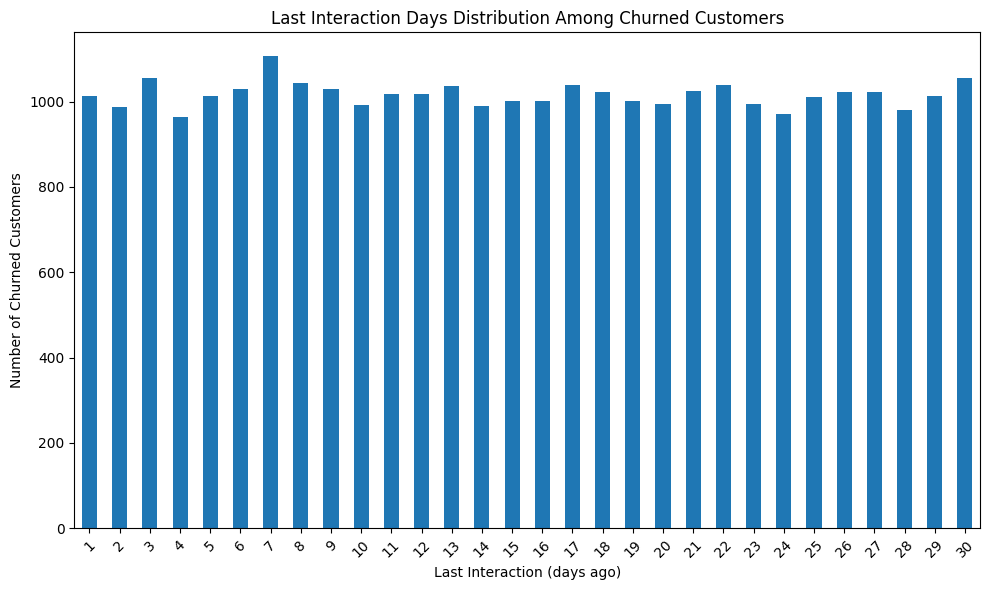

In [15]:
churned_customers_last_interaction = churned_customers.groupby('Last Interaction')['Churn'].count()
plt.figure(figsize=(10, 6))
churned_customers_last_interaction.plot(kind='bar')

plt.title('Last Interaction Days Distribution Among Churned Customers')
plt.xlabel('Last Interaction (days ago)')
plt.ylabel('Number of Churned Customers')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

2-4. 월간, 분기, 연간 계약을 한 고객들 중에서 이탈한 고객들의 수 시각화 -> 월간 계약을 한 고객들의 이탈율이 높은 것으로 보인다.

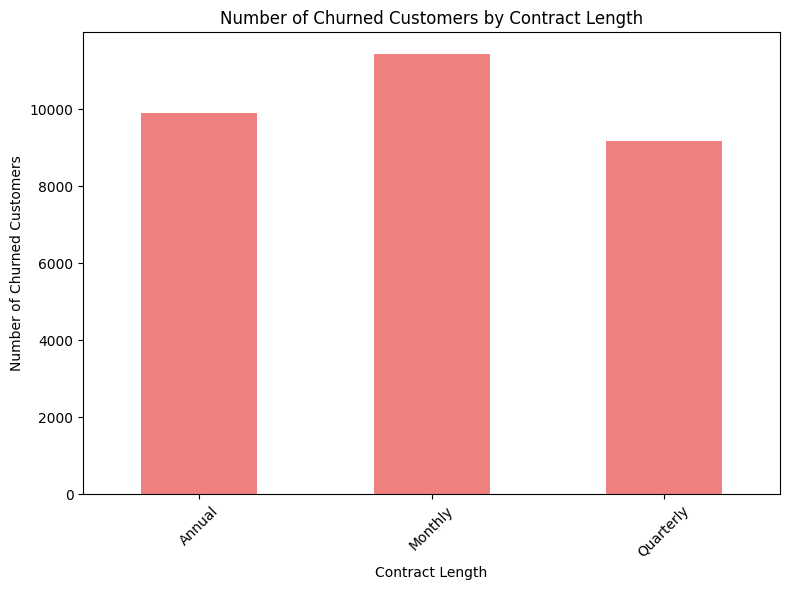

In [16]:
churned_customers_contract = churned_customers.groupby('Contract Length')['Churn'].count()
plt.figure(figsize=(8, 6))
churned_customers_contract.plot(kind='bar', color='lightcoral')

plt.title('Number of Churned Customers by Contract Length')
plt.xlabel('Contract Length')
plt.ylabel('Number of Churned Customers')
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

3. 데이터를 train, validation, test 3개로 나누기(trian-60%, val-20%, test-20%).

In [17]:
from sklearn.model_selection import train_test_split

train_data, temp_data = train_test_split(df, test_size=0.4, random_state=42)

val_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)

len(train_data), len(val_data), len(test_data)

(38624, 12875, 12875)

4. 로지스틱 회귀 모형

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

In [19]:
features = ['Age', 'Tenure', 'Usage Frequency', 'Support Calls', 'Payment Delay', 'Total Spend', 'Last Interaction']
X_train = train_data[features]
X_val = val_data[features]
X_test = test_data[features]
y_train = train_data['Churn']
y_val = val_data['Churn']
y_test = test_data['Churn']

In [20]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [21]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

In [22]:
y_val_pred = model.predict(X_val_scaled)
y_test_pred = model.predict(X_test_scaled)

val_accuracy = accuracy_score(y_val, y_val_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print("Validation Accuracy: {:.2f}%".format(val_accuracy * 100))
print("Test Accuracy: {:.2f}%".format(test_accuracy * 100))

print("Validation Classification Report:\n", classification_report(y_val, y_val_pred))
print("Test Classification Report:\n", classification_report(y_test, y_test_pred))

Validation Accuracy: 81.03%
Test Accuracy: 81.66%
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.81      0.82      6810
           1       0.79      0.81      0.80      6065

    accuracy                           0.81     12875
   macro avg       0.81      0.81      0.81     12875
weighted avg       0.81      0.81      0.81     12875

Test Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83      6784
           1       0.81      0.81      0.81      6091

    accuracy                           0.82     12875
   macro avg       0.82      0.82      0.82     12875
weighted avg       0.82      0.82      0.82     12875



5. 랜덤 포레스트 모형 -> 정확도가 약 92%로 가장 좋은 모델

In [23]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [24]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

RandomForestClassifier(random_state=42)

In [25]:
y_val_pred_rf = rf_model.predict(X_val_scaled)
y_test_pred_rf = rf_model.predict(X_test_scaled)

val_accuracy_rf = accuracy_score(y_val, y_val_pred_rf)
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)

print("Random Forest Validation Accuracy: {:.2f}%".format(val_accuracy_rf * 100))
print("Random Forest Test Accuracy: {:.2f}%".format(test_accuracy_rf * 100))

print("Validation Classification Report (Random Forest):\n", classification_report(y_val, y_val_pred_rf))
print("Test Classification Report (Random Forest):\n", classification_report(y_test, y_test_pred_rf))

Random Forest Validation Accuracy: 92.01%
Random Forest Test Accuracy: 91.96%
Validation Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.93      0.92      0.92      6810
           1       0.91      0.92      0.92      6065

    accuracy                           0.92     12875
   macro avg       0.92      0.92      0.92     12875
weighted avg       0.92      0.92      0.92     12875

Test Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.93      0.92      0.92      6784
           1       0.91      0.92      0.92      6091

    accuracy                           0.92     12875
   macro avg       0.92      0.92      0.92     12875
weighted avg       0.92      0.92      0.92     12875



6. XGBoost 모델

In [26]:
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

In [27]:
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_scaled, y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:17:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [28]:
y_val_pred_xgb = xgb_model.predict(X_val_scaled)
y_test_pred_xgb = xgb_model.predict(X_test_scaled)

val_accuracy_xgb = accuracy_score(y_val, y_val_pred_xgb)
test_accuracy_xgb = accuracy_score(y_test, y_test_pred_xgb)

print("XGBoost Validation Accuracy: {:.2f}%".format(val_accuracy_xgb * 100))
print("XGBoost Test Accuracy: {:.2f}%".format(test_accuracy_xgb * 100))

print("Validation Classification Report (XGBoost):\n", classification_report(y_val, y_val_pred_xgb))
print("Test Classification Report (XGBoost):\n", classification_report(y_test, y_test_pred_xgb))

XGBoost Validation Accuracy: 91.73%
XGBoost Test Accuracy: 91.50%
Validation Classification Report (XGBoost):
               precision    recall  f1-score   support

           0       0.93      0.91      0.92      6810
           1       0.90      0.92      0.91      6065

    accuracy                           0.92     12875
   macro avg       0.92      0.92      0.92     12875
weighted avg       0.92      0.92      0.92     12875

Test Classification Report (XGBoost):
               precision    recall  f1-score   support

           0       0.92      0.92      0.92      6784
           1       0.91      0.91      0.91      6091

    accuracy                           0.91     12875
   macro avg       0.91      0.91      0.91     12875
weighted avg       0.92      0.91      0.91     12875

